- Statistical Inference 
    - Point Estimatin
    - Confidence Interval for Estimation 
    - Confidence Level for Hypothesis Testing

* Populatin Mean
* Population proportion
* ~~Population Variance~~

-----
$E(X_i) = \mu, \qquad$
$E(\bar X) = \mu,$

$V(X_i) = \sigma^2, \qquad $
$V(\bar X) = \displaystyle{\sigma^2 \over n} $

$\widehat{\sigma^2} = S^2 = \displaystyle{1\over n-1} \displaystyle\sum_{i=1}^n \left(X_i-\bar X\right)^2$

Population|Sample Estimator|Error Margin
-|-|-
$\mu$|$\hat \mu = \bar X = \displaystyle\frac{1}{n}\displaystyle\sum_{i=1}^n X_i$|$t_{\alpha/2,\nu}\sqrt{S^2 \over n}, \quad \nu=n-1$
$\mu_1 - \mu_2$|$\bar X_1 - \bar X_2$|$t_{\alpha/2,\nu}\sqrt{{S_1^2 \over n_1}+{S_2^2 \over n_2}}, \qquad \nu=\min\{n_1,n_2\}-1$

<!-- $S = \hat \sigma = \sqrt{\frac{1}{n-1}\displaystyle\sum_{i=1}^n \left(X_i-\bar X\right)^2}$|||$\sigma$ -->

-----
Suppose that Y has a binomial distribution with $n$ trials and probability of success
on any one trial denoted by $\pi$. 

$$Y = \displaystyle\sum_{i=1}^{n} X_i, \qquad \text{where} \quad
X_i=\left\{\begin{array}{ll}
1,&\quad \text{if the ith trial results in success,}\\ 
0,&\quad \text{otherwise.}
\end{array}\right.$$

$E(X_i) = \pi, \qquad$ 
$E(Y) = E\left(\displaystyle\sum_{i=1}^{n} X_i\right) = \sum E(X_i) = n\pi, \qquad$ 
$E(\bar X) = \pi$
 

$V(X_i) = \pi(1 − \pi), \qquad$
$V(Y) = V\left(\displaystyle\sum_{i=1}^{n} X_i\right) = \sum V(X_i) = n\pi(1 − \pi), \qquad$
$V(\bar X) = \displaystyle{\pi(1 − \pi) \over n}$


- Probability of success $\pi$ is nearly normal when the sample size $n$ is sufficiently large that $n\pi$ and $n(1 − \pi)$ are **both at least $10$**.

Population|Sample Estimator|Error Margin
-|-|-
$\pi$|$\hat \pi = p = \displaystyle{Y\over n}$|$z_{\alpha/2}\sqrt{p.(1-p) \over n}$
$\pi_1 - \pi_2$|$p_1 - p_2 $|$z_{\alpha/2}\sqrt{p_{\text{pooled}}.(1-p_{\text{pooled}})\left(\frac{1}{n_1}+\frac{1}{n_2}\right)}, \qquad p_{\text{pooled}} = \frac{Y_1+Y_2}{n_1+n_2}$


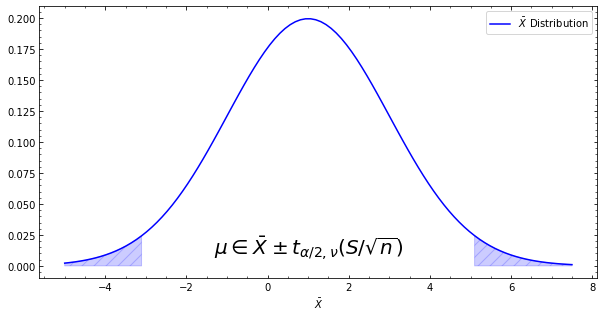

In [47]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x = np.linspace(-5,7.5,100)
y = st.norm.pdf(x,loc=1,scale=2.)

## PLOT ###
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(which='both', direction='in',right=True,top=True)   
ax.minorticks_on()

ax.plot(x,y,label=r'$\bar X$ Distribution',c="b")
ax.text(1, 0.01, r'$\mu \in \bar X \pm t_{\alpha/2,\nu}\left(S /\sqrt{n}\right)$',ha='center',size=20,)
ax.fill_between(x[(x > 1+4 )], 0, y[(x > 1+4)], color='b', hatch='//', alpha=0.2)
ax.fill_between(x[(x < 1-4 )], 0, y[(x < 1-4)], color='b', hatch='//', alpha=0.2)

ax.set_xlabel(r"$\bar X$")

plt.legend()
plt.show()

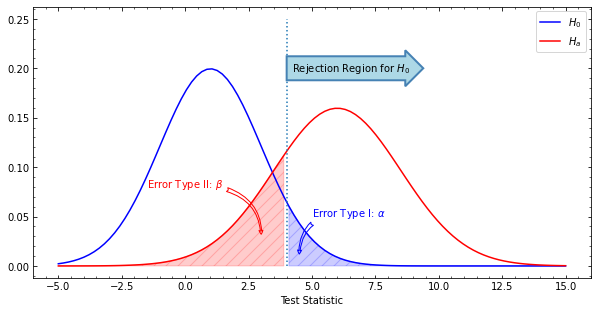

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

x = np.linspace(-5,15,100)
y0 = st.norm.pdf(x,loc=1,scale=2.)
y1 = st.norm.pdf(x,loc=6,scale=2.5)


## PLOT ###
fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(which='both', direction='in',right=True,top=True)   
ax.minorticks_on()

ax.plot(x,y0,label=r'$H_0$',c="b")
ax.plot(x,y1,label=r'$H_a$',c="r")
ax.vlines(4,0,0.25,linestyle=':')
ax.text(4.2, 0.2, r"Rejection Region for $H_0$",
            ha="left", va="center", rotation=0, size=10,
            bbox=dict(boxstyle="rarrow,pad=0.5",
                      fc="lightblue", ec="steelblue", lw=2))
ax.fill_between(x[(x > 4 )], 0, y0[(x > 4)], color='b', hatch='//', alpha=0.2)
ax.fill_between(x[(x < 4 )], 0, y1[(x < 4)], color='red', hatch='//', alpha=0.2)

ax.set_xlabel("Test Statistic")

ax.annotate(r'Error Type I: $\alpha$',
            xy=(4.5, 0.01), 
            xytext=(5, 0.05), 
            size=10,c="b",
            arrowprops=dict(arrowstyle="fancy",fc="none",ec="b",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'Error Type II: $\beta$',
            xy=(3, 0.03), 
            xytext=(-1.5, 0.08), 
            size=10,c="r",
            arrowprops=dict(arrowstyle="fancy",fc="none",ec="r",
                            connectionstyle="angle3,angleA=0,angleB=-90"))


plt.legend()
plt.show()

------

$ $|$X_1$|$...$|$X_n$
-|-|-|-
$Y_1$|$O_{11}\left(E_{11}\right)$|$...$|$O_{1n}\left(E_{1n}\right)$
$...$|$...$|$...$|$...$
$Y_m$|$O_{m1}\left(E_{m1}\right)$|$...$|$O_{mn}\left(E_{mn}\right)$

$$
\displaystyle\sum_{i,j=1}^{n,m} \frac{(O_{ij}-E_{ij})^2}{E_{ij}}\sim\chi^2_\nu, \qquad \nu=(n-1).(m-1)
$$

---------
$$
[y]_{m\times 1} \left([x]_{n\times 1}\right), \qquad \Rightarrow U_{kl}=Cov\left(y_k,y_l\right)\approx\displaystyle\sum_{i,j}^{n}\left.\frac{\partial y_k}{\partial x_i}\frac{\partial y_l}{\partial x_j}\right|_{x=\mu} Cov(x_i,x_j)
$$

$$
U=AVA^T, \qquad A_{ij}=\left.\frac{\partial y_i}{\partial x_j}\right|_{x=\mu}, \qquad V_{ij}=Cov(x_i,x_j)
$$

--------
$$
V_{xy} = E[xy]-E[x]E[y], \quad \rho_{xy}=\frac{V_{xy}}{\sigma_x \sigma_y}
$$

$$
S_{xx} = \sum(x_i-\bar x)^2, \quad S_{xy} = \sum(x_i-\bar x)(y_i-\bar y), \quad S_{yy} = \sum(y_i-\bar y)^2 = SST
$$

$$
SSR_{reg} = \sum(\hat y_i - \bar y)^2, \qquad SSE = \sum(y_i-\hat y_i)^2, \qquad  S^2 = MSE = \frac{SSE}{n-2}
$$

$$
SSR+SSE = SST, \qquad r^2 = \frac{SSR}{SST} 
$$

-----
## Regression

------
$$
Y=X\beta+\epsilon, \qquad \hat Y = X \hat\beta, \qquad \hat\beta = \left(\left(X^T X\right)^{-1}X^{T}\right)Y=AY
$$

$$
V(Y) = V(\epsilon)=\sigma^2, \qquad V(\beta) = A (\sigma^2) A^T = \left(X^T X\right)^{-1} \sigma^2
$$

Standard Error of Estimation:
$$
\widehat{\sigma^2} = S^2 = MSE = \frac{SSE}{n-(k+1)}, \qquad SSE=\sum (y_i-\hat y_i)^2=Y^T(Y-X\hat{\beta})
$$

$$
T=\frac{\hat f-f_0}{\sqrt{V(f)}} \sim t_{n-(k+1)}
$$



----------
$$
A = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}, \qquad A^{-1} = \frac{1}{ad-bc} \begin{pmatrix} d & -b \\ -c & a\end{pmatrix}
$$

---------
$$
V(y^*) = V(\hat y^* + \epsilon) = V([1,x^*][\beta_0,\beta_1]^T + \epsilon) = [1,x^*] V(\beta) [1,x^*]^T + V(\epsilon)=
\sigma^2[1,x^*] A A^T [1,x^*]^T + \sigma^2
$$

$$
V(y^*) = \sigma^2\left([1,x^*] \left(X^T X\right)^{-1} [1,x^*]^T + 1\right)
$$

$$
\hat y^* = \hat \beta_0 + x^* \hat \beta_1 \pm t_{\alpha/2,n-2}S\sqrt{[1,x^*] \left(X^T X\right)^{-1} [1,x^*]^T + 1}
$$

$$
V(E(y^*)) = V(E(\hat y^*+\epsilon)) = \sigma^2[1,x^*] \left(X^T X\right)^{-1} [1,x^*]^T + 0
$$

$$
E(\hat y^*) = \hat \beta_0 + x^* \hat \beta_1 \pm t_{\alpha/2,n-2}S\sqrt{[1,x^*] \left(X^T X\right)^{-1} [1,x^*]^T}
$$